In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kannada-tulu-test/en_dev.txt
/kaggle/input/kannada-tulu-test/tu_dev.txt
/kaggle/input/kannada-tulu-test/kn_dev.txt
/kaggle/input/kannada-tulu-train/tu_tr.txt
/kaggle/input/kannada-tulu-train/en_tr.txt
/kaggle/input/kannada-tulu-train/kn_tr.txt


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
train_en_path = '/kaggle/input/kannada-tulu-train/en_tr.txt'
train_tu_path = '/kaggle/input/kannada-tulu-train/tu_tr.txt'
train_kn_path = '/kaggle/input/kannada-tulu-train/kn_tr.txt'
test_en_path = '/kaggle/input/kannada-tulu-test/en_dev.txt'
test_tu_path = '/kaggle/input/kannada-tulu-test/tu_dev.txt'
test_kn_path = '/kaggle/input/kannada-tulu-test/kn_dev.txt'

# Helper function to read data from files
def read_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.readlines()
    return data

# Read training data
train_en_data = read_data(train_en_path)
train_tu_data = read_data(train_tu_path)
train_kn_data = read_data(train_kn_path)

# Read testing data
test_en_data = read_data(test_en_path)
test_tu_data = read_data(test_tu_path)
test_kn_data = read_data(test_kn_path)

# Convert data into pandas DataFrame for easier analysis
train_df = pd.DataFrame({
    'en': train_en_data,
    'tu': train_tu_data,
    'kn': train_kn_data
})

test_df = pd.DataFrame({
    'en': test_en_data,
    'tu': test_tu_data,
    'kn': test_kn_data
})


In [7]:
# Basic statistics and info
print("Training Data Info:")
print(train_df.info())
print("\nTesting Data Info:")
print(test_df.info())

# Check for missing values
print("\nMissing values in Training Data:")
print(train_df.isnull().sum())
print("\nMissing values in Testing Data:")
print(test_df.isnull().sum())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   en      8300 non-null   object
 1   tu      8300 non-null   object
 2   kn      8300 non-null   object
dtypes: object(3)
memory usage: 194.7+ KB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   en      1000 non-null   object
 1   tu      1000 non-null   object
 2   kn      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None

Missing values in Training Data:
en    0
tu    0
kn    0
dtype: int64

Missing values in Testing Data:
en    0
tu    0
kn    0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

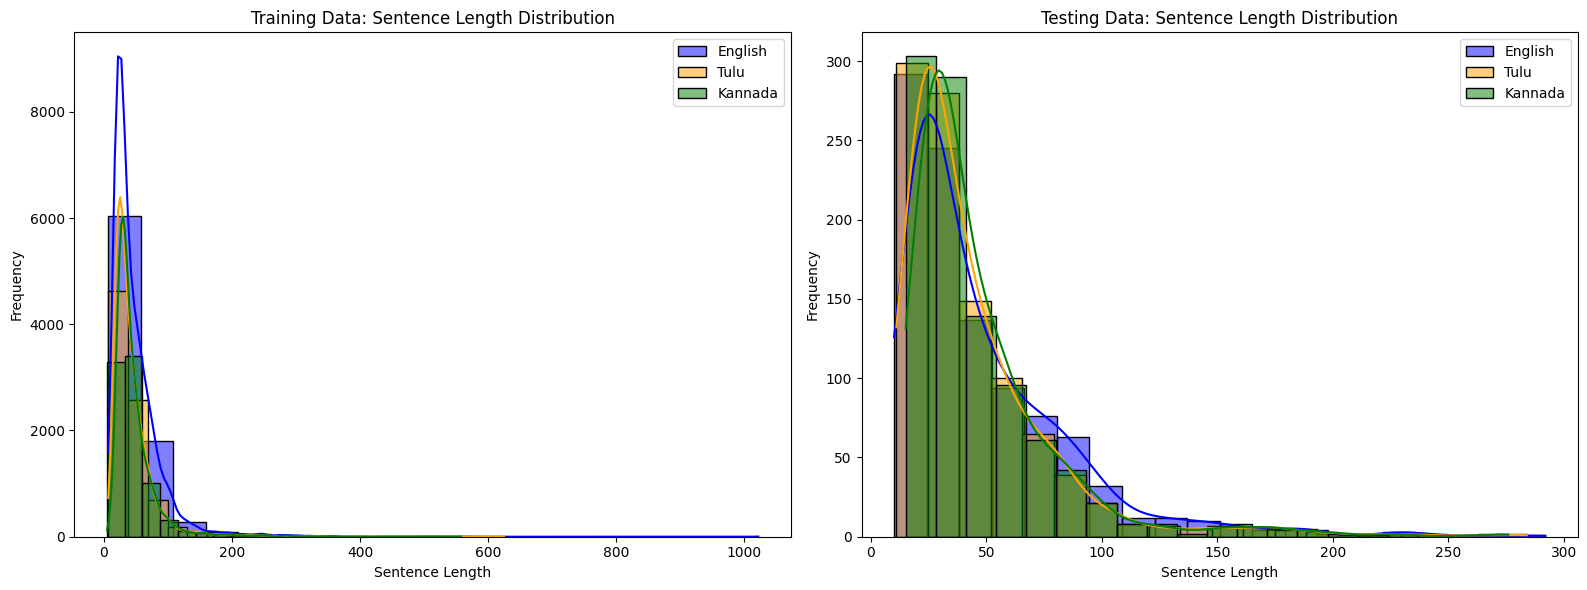

In [8]:
# Distribution of lengths of sentences
train_df['en_len'] = train_df['en'].apply(len)
train_df['tu_len'] = train_df['tu'].apply(len)
train_df['kn_len'] = train_df['kn'].apply(len)

test_df['en_len'] = test_df['en'].apply(len)
test_df['tu_len'] = test_df['tu'].apply(len)
test_df['kn_len'] = test_df['kn'].apply(len)

# Plotting distribution of sentence lengths
plt.figure(figsize=(16, 6))

# Training Data
plt.subplot(1, 2, 1)
sns.histplot(train_df['en_len'], bins=20, kde=True, color='blue', label='English')
sns.histplot(train_df['tu_len'], bins=20, kde=True, color='orange', label='Tulu')
sns.histplot(train_df['kn_len'], bins=20, kde=True, color='green', label='Kannada')
plt.title('Training Data: Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()

# Testing Data
plt.subplot(1, 2, 2)
sns.histplot(test_df['en_len'], bins=20, kde=True, color='blue', label='English')
sns.histplot(test_df['tu_len'], bins=20, kde=True, color='orange', label='Tulu')
sns.histplot(test_df['kn_len'], bins=20, kde=True, color='green', label='Kannada')
plt.title('Testing Data: Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

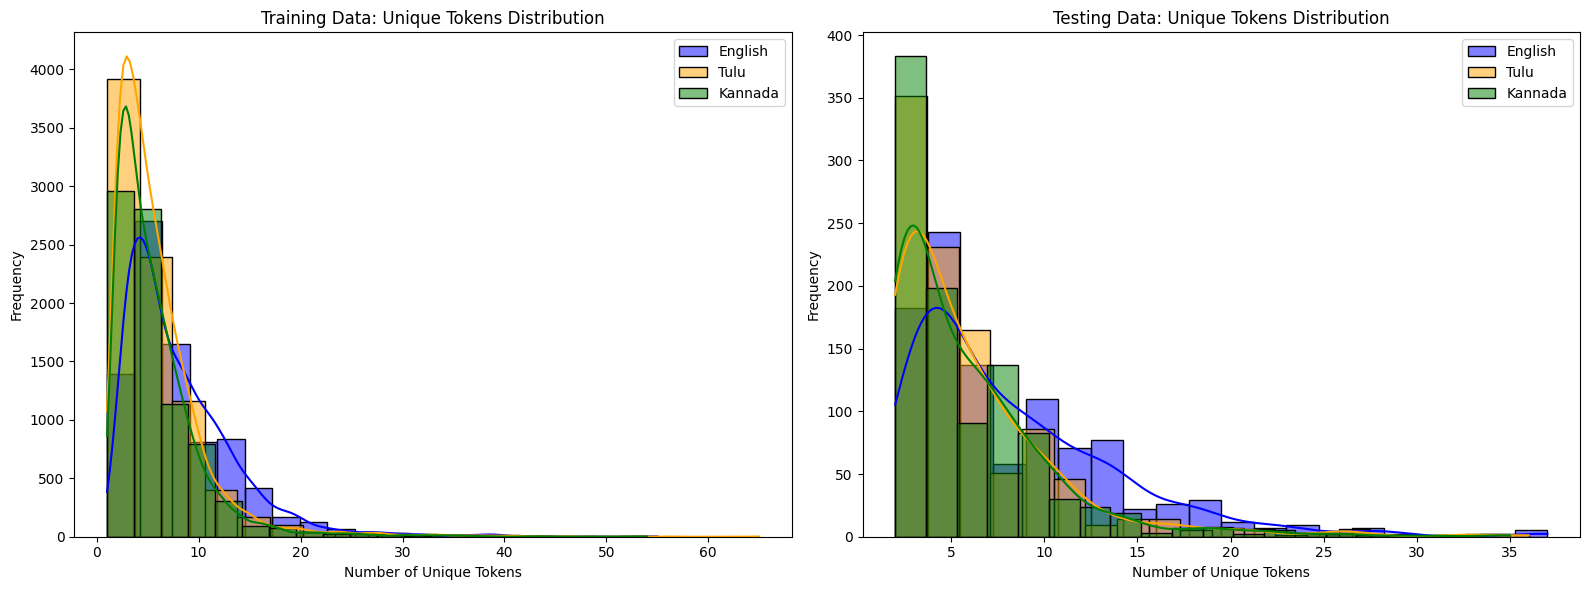

In [9]:
# Unique tokens (words) in each language
train_df['en_unique_tokens'] = train_df['en'].apply(lambda x: len(set(x.split())))
train_df['tu_unique_tokens'] = train_df['tu'].apply(lambda x: len(set(x.split())))
train_df['kn_unique_tokens'] = train_df['kn'].apply(lambda x: len(set(x.split())))

test_df['en_unique_tokens'] = test_df['en'].apply(lambda x: len(set(x.split())))
test_df['tu_unique_tokens'] = test_df['tu'].apply(lambda x: len(set(x.split())))
test_df['kn_unique_tokens'] = test_df['kn'].apply(lambda x: len(set(x.split())))

# Plotting unique tokens
plt.figure(figsize=(16, 6))

# Training Data
plt.subplot(1, 2, 1)
sns.histplot(train_df['en_unique_tokens'], bins=20, kde=True, color='blue', label='English')
sns.histplot(train_df['tu_unique_tokens'], bins=20, kde=True, color='orange', label='Tulu')
sns.histplot(train_df['kn_unique_tokens'], bins=20, kde=True, color='green', label='Kannada')
plt.title('Training Data: Unique Tokens Distribution')
plt.xlabel('Number of Unique Tokens')
plt.ylabel('Frequency')
plt.legend()

# Testing Data
plt.subplot(1, 2, 2)
sns.histplot(test_df['en_unique_tokens'], bins=20, kde=True, color='blue', label='English')
sns.histplot(test_df['tu_unique_tokens'], bins=20, kde=True, color='orange', label='Tulu')
sns.histplot(test_df['kn_unique_tokens'], bins=20, kde=True, color='green', label='Kannada')
plt.title('Testing Data: Unique Tokens Distribution')
plt.xlabel('Number of Unique Tokens')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


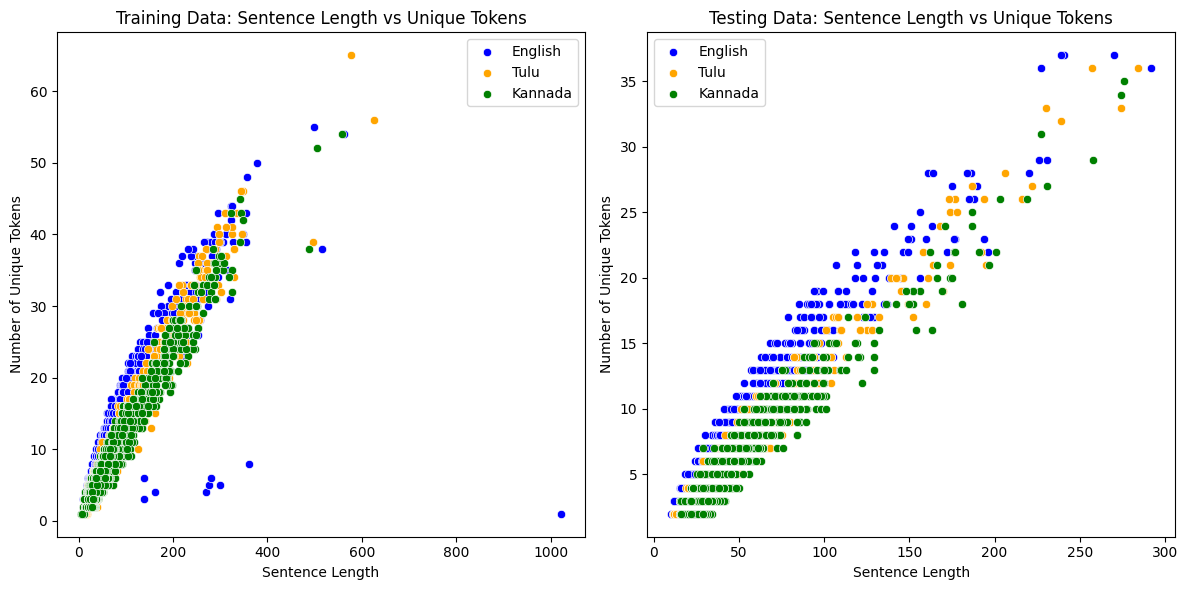

In [10]:
# Cross-language analysis: Correlation between sentence lengths and unique tokens
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='en_len', y='en_unique_tokens', data=train_df, color='blue', label='English')
sns.scatterplot(x='tu_len', y='tu_unique_tokens', data=train_df, color='orange', label='Tulu')
sns.scatterplot(x='kn_len', y='kn_unique_tokens', data=train_df, color='green', label='Kannada')
plt.title('Training Data: Sentence Length vs Unique Tokens')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Unique Tokens')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='en_len', y='en_unique_tokens', data=test_df, color='blue', label='English')
sns.scatterplot(x='tu_len', y='tu_unique_tokens', data=test_df, color='orange', label='Tulu')
sns.scatterplot(x='kn_len', y='kn_unique_tokens', data=test_df, color='green', label='Kannada')
plt.title('Testing Data: Sentence Length vs Unique Tokens')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Unique Tokens')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Basic statistics (mean, median, min, max) for sentence lengths
train_stats = train_df[['en_len', 'tu_len', 'kn_len']].describe().transpose()
test_stats = test_df[['en_len', 'tu_len', 'kn_len']].describe().transpose()

print("\nTraining Data Sentence Length Statistics:")
print(train_stats)
print("\nTesting Data Sentence Length Statistics:")
print(test_stats)



Training Data Sentence Length Statistics:
         count       mean        std  min   25%   50%   75%     max
en_len  8300.0  48.266747  40.290602  7.0  24.0  36.0  60.0  1022.0
tu_len  8300.0  44.062410  35.351842  7.0  24.0  34.0  52.0   625.0
kn_len  8300.0  46.751928  34.380301  5.0  28.0  37.0  54.0   558.0

Testing Data Sentence Length Statistics:
         count    mean        std   min   25%   50%   75%    max
en_len  1000.0  48.665  37.607620  10.0  23.0  36.0  63.0  292.0
tu_len  1000.0  44.618  34.612803  11.0  23.0  33.0  55.0  284.0
kn_len  1000.0  47.401  33.664276  15.0  27.0  36.0  56.0  276.0


In [13]:
from collections import Counter

# Function to extract top N common words
def get_top_words(text, n=10):
    words = ' '.join(text).split()
    word_freq = Counter(words)
    return word_freq.most_common(n)

# Top 10 common words in each language (training data)
top_en_words = get_top_words(train_df['en'])
top_tu_words = get_top_words(train_df['tu'])
top_kn_words = get_top_words(train_df['kn'])

print("\nTop 10 Common Words (Training Data):")
print("English:", top_en_words)
print("Tulu:", top_tu_words)
print("Kannada:", top_kn_words)



Top 10 Common Words (Training Data):
English: [('the', 5324), ('is', 2712), ('of', 2390), ('a', 1845), ('to', 1742), ('in', 1549), ('The', 1220), ('and', 1170), ('was', 524), ('on', 519)]
Tulu: [('ಈ', 346), ('ಒಂಜಿ', 320), ('ಬೊಕ್ಕ', 312), ('ಪಂದ್', 236), ('ಮಲ್ಪುವೆ', 230), ('ಉಂಡು', 195), ('.', 193), ('ಆ', 185), ('ಎಡ್ಡೆ', 123), ('ದ', 114)]
Kannada: [('ಎಂದು', 343), ('ಒಂದು', 324), ('ಈ', 322), ('ಮತ್ತು', 192), ('ಆ', 177), ('ಆದರೆ', 136), ('ನಮ್ಮ', 131), ('ಎಲ್ಲಾ', 118), ('ಇದೆ', 114), ('ಮಾಡಿ', 113)]


In [14]:
# Function to calculate language distribution
def language_distribution(data):
    total_samples = len(data)
    en_count = sum(data['en'].apply(lambda x: 1 if len(x.strip()) > 0 else 0))
    tu_count = sum(data['tu'].apply(lambda x: 1 if len(x.strip()) > 0 else 0))
    kn_count = sum(data['kn'].apply(lambda x: 1 if len(x.strip()) > 0 else 0))
    
    en_percent = (en_count / total_samples) * 100
    tu_percent = (tu_count / total_samples) * 100
    kn_percent = (kn_count / total_samples) * 100
    
    return {
        'English': {'count': en_count, 'percent': en_percent},
        'Tulu': {'count': tu_count, 'percent': tu_percent},
        'Kannada': {'count': kn_count, 'percent': kn_percent}
    }

# Print language distribution in training and testing data
train_lang_dist = language_distribution(train_df)
test_lang_dist = language_distribution(test_df)

print("\nLanguage Distribution in Training Data:")
for lang, info in train_lang_dist.items():
    print(f"{lang}: {info['count']} samples ({info['percent']:.2f}%)")

print("\nLanguage Distribution in Testing Data:")
for lang, info in test_lang_dist.items():
    print(f"{lang}: {info['count']} samples ({info['percent']:.2f}%)")



Language Distribution in Training Data:
English: 8300 samples (100.00%)
Tulu: 8300 samples (100.00%)
Kannada: 8300 samples (100.00%)

Language Distribution in Testing Data:
English: 1000 samples (100.00%)
Tulu: 1000 samples (100.00%)
Kannada: 1000 samples (100.00%)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


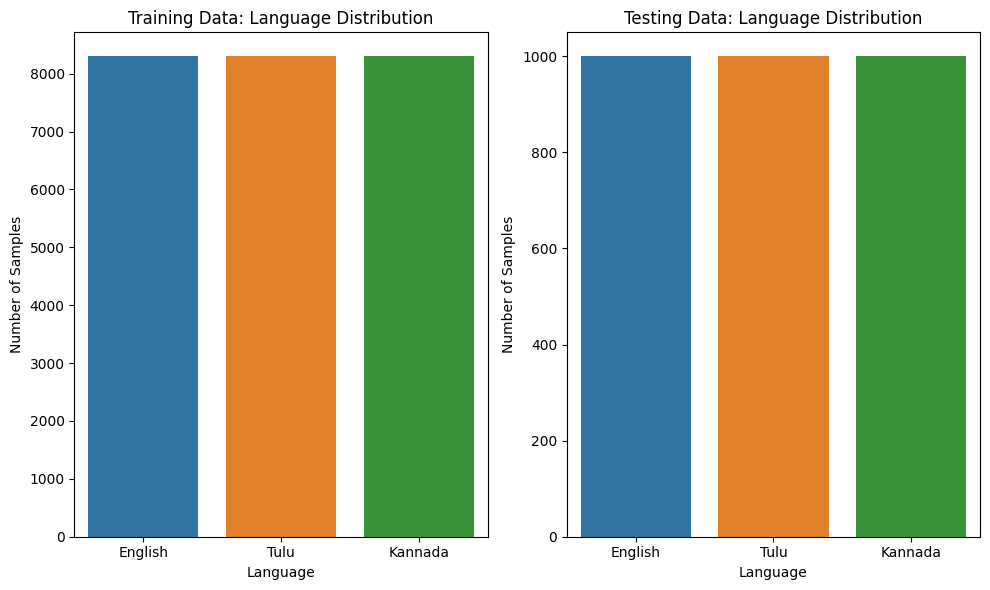

In [15]:
# Plotting language distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=list(train_lang_dist.keys()), y=[info['count'] for info in train_lang_dist.values()])
plt.title('Training Data: Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Samples')

plt.subplot(1, 2, 2)
sns.barplot(x=list(test_lang_dist.keys()), y=[info['count'] for info in test_lang_dist.values()])
plt.title('Testing Data: Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()
